In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import os

In [ ]:
df = pd.read_csv("C:/Users/Shivangi/Pictures/Screenshots/Geographical.csv")
df.head()

,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576,-1.205671,1.849122,-0.425598,...,-0.04361,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.66884,-0.914772,-0.83625,-15.75
0,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.947933,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91
1,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-0.556109,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65
2,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,0.166616,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03
3,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-0.500785,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03
4,0.059217,0.034537,-0.703441,0.188652,-0.270353,1.420526,0.467766,0.209594,-0.496505,1.239908,...,1.428818,0.501017,-0.354263,0.445184,0.060328,0.075293,-0.170387,-0.506187,-0.008470,12.65


In [6]:
for i in df.columns:
    print(df[i].unique(),"\t",df[i].nunique())

[ 0.225763 -0.692525 -0.735562 ... -0.77236  -0.996965 -0.150911] 	 1053
[-0.094169 -0.517801 -0.684055 ... -0.670596 -1.099395 -0.094333] 	 1044
[-0.603646 -0.788035  2.058215 ... -0.84042   3.515274 -0.568885] 	 1054
[ 0.497745  1.214351  0.716328 ... -0.832105 -0.508185 -0.614652] 	 1036
[ 0.874036 -0.907214 -0.011393 ...  0.277346 -1.102654  0.332477] 	 1057
[ 0.29028   0.880213  0.805396 ...  1.152162  0.192081 -0.954948] 	 1058
[-0.077659  0.406899  1.497982 ...  0.24147   0.069821 -1.527722] 	 1058
[-0.887385 -0.694895  0.114752 ...  0.229092  0.264674 -1.591471] 	 1058
[ 0.432062 -0.901869  0.692847 ...  0.019036 -0.411533 -3.678713] 	 1058
[-0.093963 -1.701574  0.052377 ... -0.068804  0.501164 -5.930209] 	 1058
[ 0.029105 -0.903893  0.024625 ...  0.24785  -1.083711 -2.091674] 	 1058
[ 0.407297 -0.791393  0.429205 ...  0.636144 -0.178807  0.881171] 	 1058
[-0.034418 -1.667463  0.576029 ... -0.392233 -1.07145  -0.138141] 	 1058
[-6.070000e-04 -3.340040e-01  4.003890e-01 ... -1.2

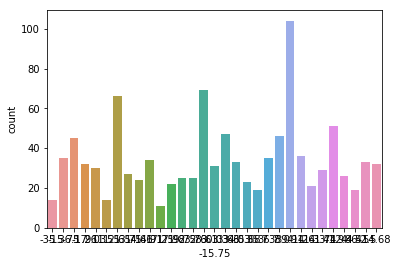

In [8]:
sns.countplot(df['-15.75'])

In [47]:
X = df.iloc[:, :68].values
Y = df.iloc[:, 68].values
X

array([[ 0.225763, -0.094169, -0.603646, ...,  1.088478, -0.123595,
         1.391141],
       [-0.692525, -0.517801, -0.788035, ...,  2.081069,  1.375763,
         1.063847],
       [-0.735562, -0.684055,  2.058215, ..., -0.385005, -0.012326,
        -0.392197],
       ...,
       [-0.77236 , -0.670596, -0.84042 , ..., -0.718175, -0.98364 ,
        -0.573822],
       [-0.996965, -1.099395,  3.515274, ..., -0.137473, -0.781036,
        -0.832167],
       [-0.150911, -0.094333, -0.568885, ...,  5.244305,  2.506568,
         1.46258 ]])

In [54]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(Y)

encoded

array([ 9,  6,  4, ..., 24, 30, 30], dtype=int64)

In [55]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, encoded, test_size = 0.2)

In [57]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
print("LogisticRegression")
print(clf.predict(X_test))
print(clf.score(X_test, y_test))

c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression
[12 30  4 26 14 29  2  3  4  6 30 16 26 26 22 14 22 14 27 14 13  6 16 13
 22 26  8  6 20 18 22 14 22 27  2 12 19 25 22  2 20 14 29  2 26 22  1 26
 29  3 16 22  5  3  8 30 30  4 12 17 15 27 22 23 19 20 18  2 22  6  1 25
  6 23 18 22  3 15 22 23 29  4 29  2 14  6 17 20 21 27 27 15 29 24 16 22
  0  5 14 26 17 22 23 21  6  3  9  4 26 27 23 24 27 14 21 25 22  6 30 17
 27 26 22 30 20  6  6 22 17  3  6 16 14 29 22 16 29 23 26 25 18  6  2 26
 30 22  6  4 14 21  9 21  7 12 22 19 10 22 25 29 29 20 14  7 28 26 22 18
 25 25  6 22  9 11 21 23 21 29 20  4 22  1 18 26 18 16 12 25 22  9 30 11
 14 28 23 22 26 21  6 22 30 26  6 23  4 17  2  9 20 19 22  7]
0.4056603773584906


In [75]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print("DTC")
predicted = clf.predict(X_test)
predicted

DTC


array([19,  7,  2,  7, 13, 13,  3,  0, 20,  6,  6,  1, 16, 26,  9, 13, 30,
       13, 22, 16, 19, 21, 22, 12, 14,  1, 26, 12, 22, 27,  7,  8, 18, 22,
       20, 25, 13, 29, 13, 25, 24, 21, 22, 21, 23, 15, 14, 26, 16, 11,  3,
        3,  9, 16, 21, 14,  2, 24, 26, 14, 21,  6, 16, 22, 10, 17, 14, 14,
        5,  5, 17, 24,  2, 22, 30,  1,  6, 22,  0, 18, 26, 12, 12, 16, 14,
        1, 23, 13, 20, 14, 14, 26, 20, 20, 24, 14, 16, 19, 30, 20,  7, 21,
       12, 11, 28, 20,  3, 21, 17, 15, 24, 12, 22, 16,  8,  3, 22, 27, 22,
       26, 16, 27, 26, 14,  7, 16, 26, 18, 21, 26,  1,  4, 28, 14, 14,  6,
       16,  6, 14,  8, 19, 14,  1, 26,  3, 28,  4, 28, 22, 25,  7, 24, 15,
       28,  3, 20,  9, 25, 30, 14, 25, 12, 21,  7, 29, 26, 27, 30,  0, 26,
       21, 19, 12,  9,  7, 27, 26, 26,  6, 14,  2, 13,  8, 20, 11, 21, 11,
        3, 14,  9,  1,  7, 21, 19, 17, 22, 20, 22, 19, 14, 14,  2, 21, 28,
       21,  1, 14, 27, 27, 19, 18,  0,  3, 21, 16,  3,  4, 17,  4,  3,  9,
        8,  6,  6, 22, 19

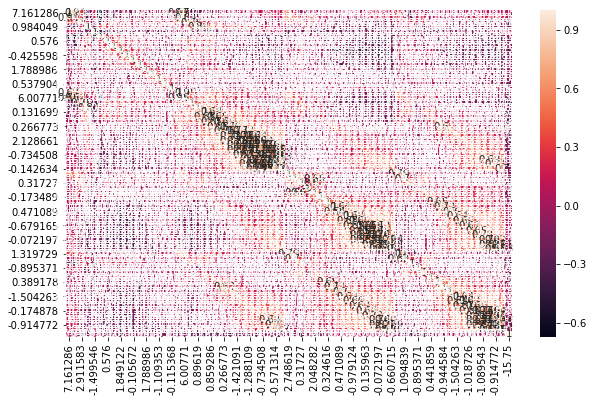

In [61]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

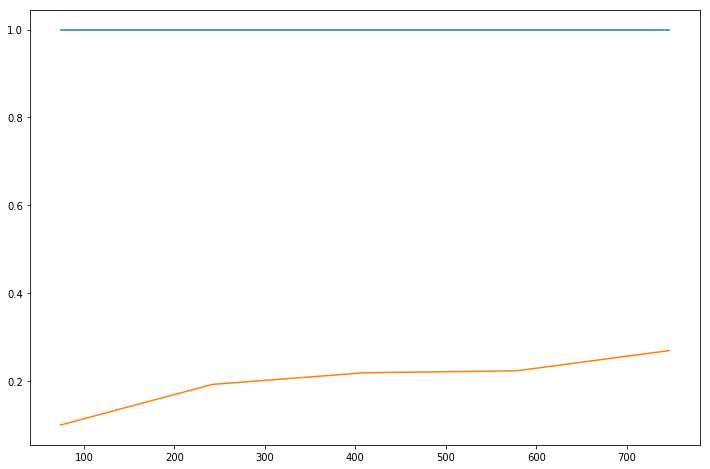

In [62]:
from sklearn.model_selection import learning_curve
lc=learning_curve(clf,X_train,y_train,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score)
plt.plot(size,test_score)

In [63]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [68]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier


scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], \
                                       encoded[train_index], encoded[test_index]
    scores_logistic.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(svm.SVC(), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be cha

In [69]:
scores_rf

[0.3597733711048159, 0.38243626062322944, 0.35795454545454547]

In [70]:
scores_svm

[0.3286118980169972, 0.36827195467422097, 0.30113636363636365]

In [71]:
scores_logistic

[0.311614730878187, 0.3031161473087819, 0.3522727272727273]

In [72]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
 
para = { 'learning_rate' : ['constant', 'invscaling', 'adaptive'],\
        'activation' : ['identity', 'logistic', 'tanh', 'relu'], 'solver' : ['lbfgs', 'sgd', 'adam'] }
                                                                                   
grid = GridSearchCV(MLPClassifier(), para, refit = True, verbose = 3)

print(grid.fit(X_train, y_train))

c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] activation=identity, learning_rate=constant, solver=lbfgs .......
[CV]  activation=identity, learning_rate=constant, solver=lbfgs, score=0.27530364372469635, total=   0.5s
[CV] activation=identity, learning_rate=constant, solver=lbfgs .......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  activation=identity, learning_rate=constant, solver=lbfgs, score=0.2832618025751073, total=   0.3s
[CV] activation=identity, learning_rate=constant, solver=lbfgs .......


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV]  activation=identity, learning_rate=constant, solver=lbfgs, score=0.2345132743362832, total=   0.3s
[CV] activation=identity, learning_rate=constant, solver=sgd .........


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, learning_rate=constant, solver=sgd, score=0.26720647773279355, total=   1.0s
[CV] activation=identity, learning_rate=constant, solver=sgd .........


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, learning_rate=constant, solver=sgd, score=0.34763948497854075, total=   1.5s
[CV] activation=identity, learning_rate=constant, solver=sgd .........


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, learning_rate=constant, solver=sgd, score=0.26991150442477874, total=   1.0s
[CV] activation=identity, learning_rate=constant, solver=adam ........


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, learning_rate=constant, solver=adam, score=0.3319838056680162, total=   1.0s
[CV] activation=identity, learning_rate=constant, solver=adam ........


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, learning_rate=constant, solver=adam, score=0.3605150214592275, total=   1.2s
[CV] activation=identity, learning_rate=constant, solver=adam ........


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, learning_rate=constant, solver=adam, score=0.30973451327433627, total=   1.1s
[CV] activation=identity, learning_rate=invscaling, solver=lbfgs .....
[CV]  activation=identity, learning_rate=invscaling, solver=lbfgs, score=0.2631578947368421, total=   0.1s
[CV] activation=identity, learning_rate=invscaling, solver=lbfgs .....
[CV]  activation=identity, learning_rate=invscaling, solver=lbfgs, score=0.3218884120171674, total=   0.2s
[CV] activation=identity, learning_rate=invscaling, solver=lbfgs .....
[CV]  activation=identity, learning_rate=invscaling, solver=lbfgs, score=0.24778761061946902, total=   0.1s
[CV] activation=identity, learning_rate=invscaling, solver=sgd .......


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, learning_rate=invscaling, solver=sgd, score=0.06072874493927125, total=   1.0s
[CV] activation=identity, learning_rate=invscaling, solver=sgd .......


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, learning_rate=invscaling, solver=sgd, score=0.034334763948497854, total=   1.2s
[CV] activation=identity, learning_rate=invscaling, solver=sgd .......


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, learning_rate=invscaling, solver=sgd, score=0.017699115044247787, total=   0.8s
[CV] activation=identity, learning_rate=invscaling, solver=adam ......


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, learning_rate=invscaling, solver=adam, score=0.3117408906882591, total=   0.9s
[CV] activation=identity, learning_rate=invscaling, solver=adam ......


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, learning_rate=invscaling, solver=adam, score=0.33476394849785407, total=   0.9s
[CV] activation=identity, learning_rate=invscaling, solver=adam ......


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, learning_rate=invscaling, solver=adam, score=0.3008849557522124, total=   1.0s
[CV] activation=identity, learning_rate=adaptive, solver=lbfgs .......
[CV]  activation=identity, learning_rate=adaptive, solver=lbfgs, score=0.2631578947368421, total=   0.1s
[CV] activation=identity, learning_rate=adaptive, solver=lbfgs .......
[CV]  activation=identity, learning_rate=adaptive, solver=lbfgs, score=0.296137339055794, total=   0.1s
[CV] activation=identity, learning_rate=adaptive, solver=lbfgs .......
[CV]  activation=identity, learning_rate=adaptive, solver=lbfgs, score=0.23893805309734514, total=   0.2s
[CV] activation=identity, learning_rate=adaptive, solver=sgd .........


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, learning_rate=adaptive, solver=sgd, score=0.29959514170040485, total=   1.2s
[CV] activation=identity, learning_rate=adaptive, solver=sgd .........


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, learning_rate=adaptive, solver=sgd, score=0.3562231759656652, total=   0.8s
[CV] activation=identity, learning_rate=adaptive, solver=sgd .........


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, learning_rate=adaptive, solver=sgd, score=0.27876106194690264, total=   0.8s
[CV] activation=identity, learning_rate=adaptive, solver=adam ........


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, learning_rate=adaptive, solver=adam, score=0.3157894736842105, total=   0.9s
[CV] activation=identity, learning_rate=adaptive, solver=adam ........


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, learning_rate=adaptive, solver=adam, score=0.34763948497854075, total=   0.9s
[CV] activation=identity, learning_rate=adaptive, solver=adam ........


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, learning_rate=adaptive, solver=adam, score=0.3008849557522124, total=   1.3s
[CV] activation=logistic, learning_rate=constant, solver=lbfgs .......
[CV]  activation=logistic, learning_rate=constant, solver=lbfgs, score=0.26720647773279355, total=   0.1s
[CV] activation=logistic, learning_rate=constant, solver=lbfgs .......
[CV]  activation=logistic, learning_rate=constant, solver=lbfgs, score=0.3133047210300429, total=   0.1s
[CV] activation=logistic, learning_rate=constant, solver=lbfgs .......
[CV]  activation=logistic, learning_rate=constant, solver=lbfgs, score=0.27876106194690264, total=   0.1s
[CV] activation=logistic, learning_rate=constant, solver=sgd .........


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, learning_rate=constant, solver=sgd, score=0.08097165991902834, total=   1.0s
[CV] activation=logistic, learning_rate=constant, solver=sgd .........


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, learning_rate=constant, solver=sgd, score=0.09871244635193133, total=   1.0s
[CV] activation=logistic, learning_rate=constant, solver=sgd .........


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, learning_rate=constant, solver=sgd, score=0.08849557522123894, total=   1.0s
[CV] activation=logistic, learning_rate=constant, solver=adam ........


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, learning_rate=constant, solver=adam, score=0.340080971659919, total=   1.3s
[CV] activation=logistic, learning_rate=constant, solver=adam ........


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, learning_rate=constant, solver=adam, score=0.36909871244635195, total=   1.1s
[CV] activation=logistic, learning_rate=constant, solver=adam ........


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, learning_rate=constant, solver=adam, score=0.3053097345132743, total=   1.4s
[CV] activation=logistic, learning_rate=invscaling, solver=lbfgs .....
[CV]  activation=logistic, learning_rate=invscaling, solver=lbfgs, score=0.2793522267206478, total=   0.1s
[CV] activation=logistic, learning_rate=invscaling, solver=lbfgs .....
[CV]  activation=logistic, learning_rate=invscaling, solver=lbfgs, score=0.3261802575107296, total=   0.1s
[CV] activation=logistic, learning_rate=invscaling, solver=lbfgs .....
[CV]  activation=logistic, learning_rate=invscaling, solver=lbfgs, score=0.30973451327433627, total=   0.1s
[CV] activation=logistic, learning_rate=invscaling, solver=sgd .......
[CV]  activation=logistic, learning_rate=invscaling, solver=sgd, score=0.024291497975708502, total=   0.1s
[CV] activation=logistic, learning_rate=invscaling, solver=sgd .......
[CV]  activation=logistic, learning_rate=invscaling, solver=sgd, score=0.030042918454935622, total=   0.1s
[CV] 

c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, learning_rate=invscaling, solver=adam, score=0.32388663967611336, total=   1.0s
[CV] activation=logistic, learning_rate=invscaling, solver=adam ......


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, learning_rate=invscaling, solver=adam, score=0.36909871244635195, total=   1.0s
[CV] activation=logistic, learning_rate=invscaling, solver=adam ......


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, learning_rate=invscaling, solver=adam, score=0.3407079646017699, total=   1.0s
[CV] activation=logistic, learning_rate=adaptive, solver=lbfgs .......
[CV]  activation=logistic, learning_rate=adaptive, solver=lbfgs, score=0.29554655870445345, total=   0.1s
[CV] activation=logistic, learning_rate=adaptive, solver=lbfgs .......
[CV]  activation=logistic, learning_rate=adaptive, solver=lbfgs, score=0.31759656652360513, total=   0.1s
[CV] activation=logistic, learning_rate=adaptive, solver=lbfgs .......
[CV]  activation=logistic, learning_rate=adaptive, solver=lbfgs, score=0.3141592920353982, total=   0.1s
[CV] activation=logistic, learning_rate=adaptive, solver=sgd .........


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, learning_rate=adaptive, solver=sgd, score=0.08906882591093117, total=   1.1s
[CV] activation=logistic, learning_rate=adaptive, solver=sgd .........


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, learning_rate=adaptive, solver=sgd, score=0.09012875536480687, total=   1.1s
[CV] activation=logistic, learning_rate=adaptive, solver=sgd .........


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, learning_rate=adaptive, solver=sgd, score=0.09292035398230089, total=   1.1s
[CV] activation=logistic, learning_rate=adaptive, solver=adam ........


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, learning_rate=adaptive, solver=adam, score=0.3360323886639676, total=   1.0s
[CV] activation=logistic, learning_rate=adaptive, solver=adam ........


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, learning_rate=adaptive, solver=adam, score=0.3776824034334764, total=   1.3s
[CV] activation=logistic, learning_rate=adaptive, solver=adam ........


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, learning_rate=adaptive, solver=adam, score=0.34513274336283184, total=   1.1s
[CV] activation=tanh, learning_rate=constant, solver=lbfgs ...........
[CV]  activation=tanh, learning_rate=constant, solver=lbfgs, score=0.30364372469635625, total=   0.0s
[CV] activation=tanh, learning_rate=constant, solver=lbfgs ...........
[CV]  activation=tanh, learning_rate=constant, solver=lbfgs, score=0.3648068669527897, total=   0.0s
[CV] activation=tanh, learning_rate=constant, solver=lbfgs ...........
[CV]  activation=tanh, learning_rate=constant, solver=lbfgs, score=0.3141592920353982, total=   0.0s
[CV] activation=tanh, learning_rate=constant, solver=sgd .............


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, learning_rate=constant, solver=sgd, score=0.2145748987854251, total=   1.0s
[CV] activation=tanh, learning_rate=constant, solver=sgd .............


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, learning_rate=constant, solver=sgd, score=0.3218884120171674, total=   1.0s
[CV] activation=tanh, learning_rate=constant, solver=sgd .............


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, learning_rate=constant, solver=sgd, score=0.2610619469026549, total=   1.3s
[CV] activation=tanh, learning_rate=constant, solver=adam ............


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, learning_rate=constant, solver=adam, score=0.3360323886639676, total=   1.4s
[CV] activation=tanh, learning_rate=constant, solver=adam ............


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, learning_rate=constant, solver=adam, score=0.38197424892703863, total=   1.1s
[CV] activation=tanh, learning_rate=constant, solver=adam ............


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, learning_rate=constant, solver=adam, score=0.3274336283185841, total=   1.2s
[CV] activation=tanh, learning_rate=invscaling, solver=lbfgs .........
[CV]  activation=tanh, learning_rate=invscaling, solver=lbfgs, score=0.27530364372469635, total=   0.0s
[CV] activation=tanh, learning_rate=invscaling, solver=lbfgs .........
[CV]  activation=tanh, learning_rate=invscaling, solver=lbfgs, score=0.3948497854077253, total=   0.0s
[CV] activation=tanh, learning_rate=invscaling, solver=lbfgs .........
[CV]  activation=tanh, learning_rate=invscaling, solver=lbfgs, score=0.3141592920353982, total=   0.0s
[CV] activation=tanh, learning_rate=invscaling, solver=sgd ...........
[CV]  activation=tanh, learning_rate=invscaling, solver=sgd, score=0.020242914979757085, total=   0.5s
[CV] activation=tanh, learning_rate=invscaling, solver=sgd ...........
[CV]  activation=tanh, learning_rate=invscaling, solver=sgd, score=0.02145922746781116, total=   0.4s
[CV] activation=tanh, learning

c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, learning_rate=invscaling, solver=adam, score=0.31983805668016196, total=   1.1s
[CV] activation=tanh, learning_rate=invscaling, solver=adam ..........


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, learning_rate=invscaling, solver=adam, score=0.3776824034334764, total=   1.1s
[CV] activation=tanh, learning_rate=invscaling, solver=adam ..........


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, learning_rate=invscaling, solver=adam, score=0.3141592920353982, total=   1.7s
[CV] activation=tanh, learning_rate=adaptive, solver=lbfgs ...........
[CV]  activation=tanh, learning_rate=adaptive, solver=lbfgs, score=0.291497975708502, total=   0.1s
[CV] activation=tanh, learning_rate=adaptive, solver=lbfgs ...........
[CV]  activation=tanh, learning_rate=adaptive, solver=lbfgs, score=0.30472103004291845, total=   0.0s
[CV] activation=tanh, learning_rate=adaptive, solver=lbfgs ...........
[CV]  activation=tanh, learning_rate=adaptive, solver=lbfgs, score=0.2831858407079646, total=   0.1s
[CV] activation=tanh, learning_rate=adaptive, solver=sgd .............


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, learning_rate=adaptive, solver=sgd, score=0.2631578947368421, total=   1.4s
[CV] activation=tanh, learning_rate=adaptive, solver=sgd .............


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, learning_rate=adaptive, solver=sgd, score=0.3133047210300429, total=   1.5s
[CV] activation=tanh, learning_rate=adaptive, solver=sgd .............


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, learning_rate=adaptive, solver=sgd, score=0.252212389380531, total=   1.5s
[CV] activation=tanh, learning_rate=adaptive, solver=adam ............


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, learning_rate=adaptive, solver=adam, score=0.32793522267206476, total=   1.5s
[CV] activation=tanh, learning_rate=adaptive, solver=adam ............


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, learning_rate=adaptive, solver=adam, score=0.3776824034334764, total=   1.2s
[CV] activation=tanh, learning_rate=adaptive, solver=adam ............


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, learning_rate=adaptive, solver=adam, score=0.3495575221238938, total=   1.2s
[CV] activation=relu, learning_rate=constant, solver=lbfgs ...........
[CV]  activation=relu, learning_rate=constant, solver=lbfgs, score=0.27530364372469635, total=   0.1s
[CV] activation=relu, learning_rate=constant, solver=lbfgs ...........
[CV]  activation=relu, learning_rate=constant, solver=lbfgs, score=0.3218884120171674, total=   0.1s
[CV] activation=relu, learning_rate=constant, solver=lbfgs ...........
[CV]  activation=relu, learning_rate=constant, solver=lbfgs, score=0.35398230088495575, total=   0.1s
[CV] activation=relu, learning_rate=constant, solver=sgd .............


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, learning_rate=constant, solver=sgd, score=0.21862348178137653, total=   1.0s
[CV] activation=relu, learning_rate=constant, solver=sgd .............


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, learning_rate=constant, solver=sgd, score=0.27896995708154504, total=   1.0s
[CV] activation=relu, learning_rate=constant, solver=sgd .............


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, learning_rate=constant, solver=sgd, score=0.26991150442477874, total=   1.0s
[CV] activation=relu, learning_rate=constant, solver=adam ............


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, learning_rate=constant, solver=adam, score=0.32793522267206476, total=   1.1s
[CV] activation=relu, learning_rate=constant, solver=adam ............


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, learning_rate=constant, solver=adam, score=0.41201716738197425, total=   1.0s
[CV] activation=relu, learning_rate=constant, solver=adam ............


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, learning_rate=constant, solver=adam, score=0.37610619469026546, total=   1.0s
[CV] activation=relu, learning_rate=invscaling, solver=lbfgs .........
[CV]  activation=relu, learning_rate=invscaling, solver=lbfgs, score=0.3117408906882591, total=   0.0s
[CV] activation=relu, learning_rate=invscaling, solver=lbfgs .........
[CV]  activation=relu, learning_rate=invscaling, solver=lbfgs, score=0.3776824034334764, total=   0.1s
[CV] activation=relu, learning_rate=invscaling, solver=lbfgs .........
[CV]  activation=relu, learning_rate=invscaling, solver=lbfgs, score=0.33185840707964603, total=   0.1s
[CV] activation=relu, learning_rate=invscaling, solver=sgd ...........
[CV]  activation=relu, learning_rate=invscaling, solver=sgd, score=0.044534412955465584, total=   0.7s
[CV] activation=relu, learning_rate=invscaling, solver=sgd ...........
[CV]  activation=relu, learning_rate=invscaling, solver=sgd, score=0.012875536480686695, total=   0.7s
[CV] activation=relu, learni

c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, learning_rate=invscaling, solver=adam, score=0.3360323886639676, total=   1.0s
[CV] activation=relu, learning_rate=invscaling, solver=adam ..........


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, learning_rate=invscaling, solver=adam, score=0.4034334763948498, total=   1.0s
[CV] activation=relu, learning_rate=invscaling, solver=adam ..........


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, learning_rate=invscaling, solver=adam, score=0.3584070796460177, total=   1.1s
[CV] activation=relu, learning_rate=adaptive, solver=lbfgs ...........
[CV]  activation=relu, learning_rate=adaptive, solver=lbfgs, score=0.3157894736842105, total=   0.0s
[CV] activation=relu, learning_rate=adaptive, solver=lbfgs ...........
[CV]  activation=relu, learning_rate=adaptive, solver=lbfgs, score=0.34334763948497854, total=   0.1s
[CV] activation=relu, learning_rate=adaptive, solver=lbfgs ...........
[CV]  activation=relu, learning_rate=adaptive, solver=lbfgs, score=0.336283185840708, total=   0.1s
[CV] activation=relu, learning_rate=adaptive, solver=sgd .............


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, learning_rate=adaptive, solver=sgd, score=0.2388663967611336, total=   0.9s
[CV] activation=relu, learning_rate=adaptive, solver=sgd .............


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, learning_rate=adaptive, solver=sgd, score=0.27896995708154504, total=   1.3s
[CV] activation=relu, learning_rate=adaptive, solver=sgd .............


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, learning_rate=adaptive, solver=sgd, score=0.23008849557522124, total=   1.6s
[CV] activation=relu, learning_rate=adaptive, solver=adam ............


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, learning_rate=adaptive, solver=adam, score=0.3319838056680162, total=   1.1s
[CV] activation=relu, learning_rate=adaptive, solver=adam ............


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, learning_rate=adaptive, solver=adam, score=0.41630901287553645, total=   1.1s
[CV] activation=relu, learning_rate=adaptive, solver=adam ............


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:  1.5min finished
c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV]  activation=relu, learning_rate=adaptive, solver=adam, score=0.3805309734513274, total=   1.1s
GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': ['constant', 'invscaling', 'adaptive'], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)


c:\users\sarthak\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [73]:
print("Best param %s"%grid.best_params_)
print("BEST SCORE FOUND {}".format(grid.best_score_))

Best param {'activation': 'relu', 'learning_rate': 'adaptive', 'solver': 'adam'}
BEST SCORE FOUND 0.37535410764872523


In [76]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
actual = y_test 
results = confusion_matrix(actual, predicted) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted)) 

Confusion Matrix :
[[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 2 2 0 0 0 1]
 [1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 2 3 0 1 0 0 1 0 0 0 0]
 [0 1 1 4 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0]
 [0 2 0 0 1 0 1 0 1 1 0 0 0 0 2 0 3 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 9 0 1 1 0 0 0 0 4 1 1 0 0 1 1 1 2 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 1 1 0 0 0 0 2 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 2 0 2 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 3 1 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 1 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 3 4 0 0 1 0 0 0 0 0 2 0 0 2 3 1 0 0 0 1 0 0 2 2 0 1 1 0]
 [0 1 